# Convolusion Neural Network for MNIST 

In [101]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [102]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)


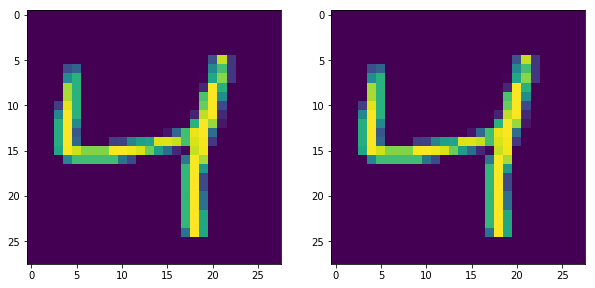

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
print(x_train.shape)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(x_train[2]/255)
plt.subplot(122)
plt.imshow(x_train[2])

In [104]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [105]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [106]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [107]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [110]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [111]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.2631 - acc: 0.9185 - val_loss: 0.0677 - val_acc: 0.9776
Epoch 2/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0887 - acc: 0.9733 - val_loss: 0.0419 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.0695 - acc: 0.9796 - val_loss: 0.0403 - val_acc: 0.9871
Epoch 4/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0559 - acc: 0.9831 - val_loss: 0.0337 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.0491 - acc: 0.9854 - val_loss: 0.0307 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.0423 - acc: 0.9878 - val_loss: 0.0292 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0383 - acc: 0.9885 - val_loss: 0.0312 -

In [113]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028324717626467464
Test accuracy: 0.9907
